<a href="https://colab.research.google.com/github/Husain-Vora/Deep-Learning-and-Machine-Learning/blob/main/Notebooks/CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, GlobalMaxPooling3D
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [ ]:
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [ ]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['Accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - Accuracy: 0.3535 - loss: 1.7529 - val_Accuracy: 0.5209 - val_loss: 1.3187
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - Accuracy: 0.5331 - loss: 1.2908 - val_Accuracy: 0.6016 - val_loss: 1.1176
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - Accuracy: 0.5900 - loss: 1.1473 - val_Accuracy: 0.6385 - val_loss: 1.0059
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - Accuracy: 0.6314 - loss: 1.0402 - val_Accuracy: 0.6379 - val_loss: 1.0043
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - Accuracy: 0.6584 - loss: 0.9550 - val_Accuracy: 0.6719 - val_loss: 0.9430
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - Accuracy: 0.6801 - loss: 0.8989 - val_Accuracy: 0.6878 - val_loss: 0.8929
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - Accuracy: 0.7049 - loss: 0.8376 - val_Accuracy: 0.6895 - val_loss: 0.8808
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - Accuracy: 0.7187 - loss: 0.

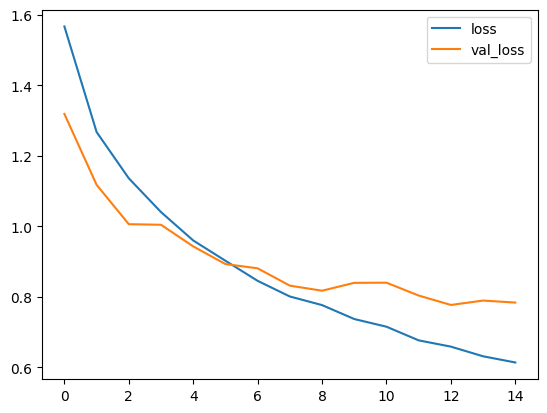

In [ ]:
#loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label=['loss'])
plt.plot(r.history['val_loss'], label=['val_loss'])
plt.legend()
plt.show()

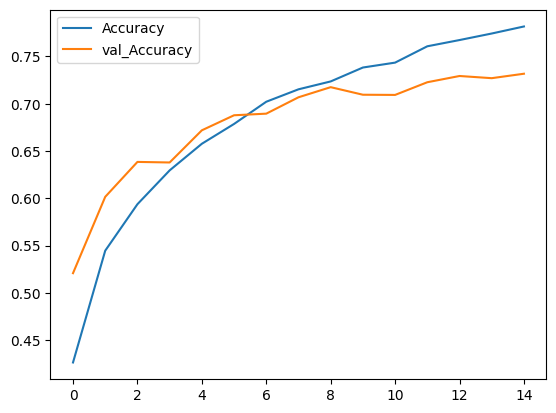

In [ ]:
#Accuracy per iteration
plt.plot(r.history['Accuracy'], label='Accuracy')
plt.plot(r.history['val_Accuracy'], label='val_Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix without normalization
[[748  14  37   9  11   9   5  16 107  44]
 [ 11 839   3   7   4   3   7   2  32  92]
 [ 69   6 586  61  91  67  53  43  22   2]
 [ 20  11  54 494  86 194  60  47  21  13]
 [ 20   2  58  48 704  46  30  76  14   2]
 [ 11   3  28 164  52 638  19  65  12   8]
 [  4   4  33  64  51  34 793   7  10   0]
 [ 17   3  17  25  59  65   1 797   8   8]
 [ 39  20   4  10   4   6   2   3 889  23]
 [ 27  54   8  12   7  14   4  16  29 829]]


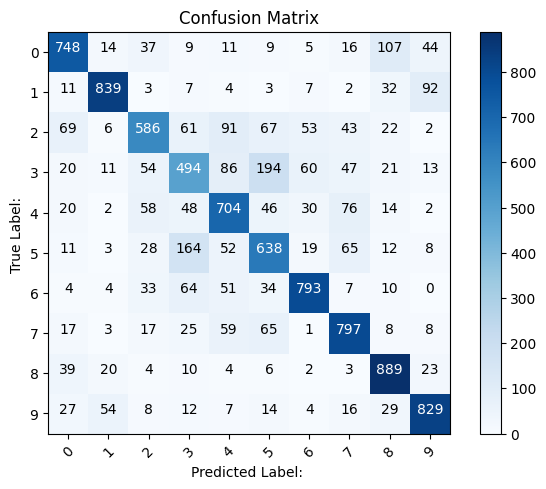

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots confusion matrix.
  Normalisation can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Confusion Matrix with normalization")
  else:
    print("Confusion Matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel("True Label: ")
  plt.xlabel("Predicted Label: ")
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))






In [ ]:
#label mapping
labels= '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

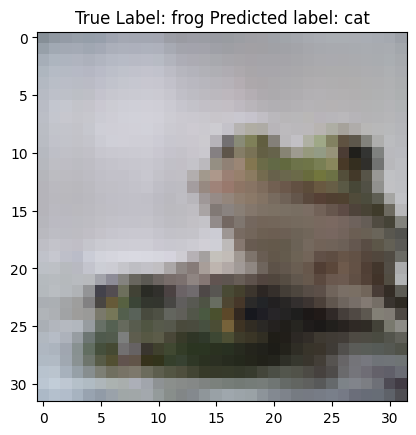

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s Predicted label: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()